In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import os
os.listdir()

['.ipynb_checkpoints', 'BlackFriday.csv', 'Black_Friday.ipynb']

In [2]:
data=pd.read_csv('BlackFriday.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
data=data.fillna(0)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [4]:
# data types used in dataset
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [5]:
#columns
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

Let's take gender first

In [6]:
gender=np.unique(data.Gender)
female=len(data.Gender[data.Gender==gender[0]])
male=len(data.Gender[data.Gender==gender[1]])

([<matplotlib.patches.Wedge at 0x2349dfb4128>,
 [Text(1.5754815260488066, 1.5355318170194077, 'Female'),
  Text(-1.5754814541653728, -1.5355318907730189, 'Male')])

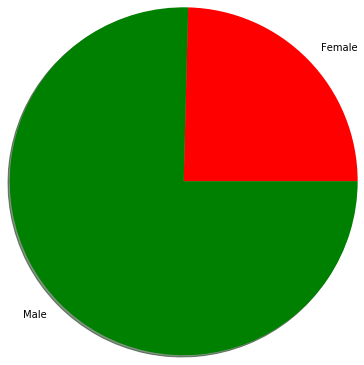

In [7]:
plt.pie([female,male],labels=['Female','Male'],colors=['red','green'],shadow=True,radius=2)

Now, Take Marital Status

In [8]:
# 0 = Non Married
# 1 = Married
#lets take numbers of M vs NM
married=data.Marital_Status[data.Marital_Status==0]
non_married=data.Marital_Status[data.Marital_Status==1]

([<matplotlib.patches.Wedge at 0x2349e016198>,
 [Text(-0.31087933967974596, 1.055155929784923, 'Married'),
  Text(0.3108793396797463, -1.055155929784923, 'Non-Married')])

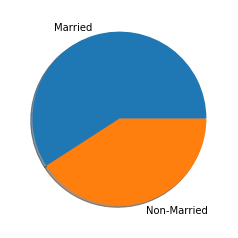

In [9]:
plt.pie([len(married),len(non_married)],labels=['Married','Non-Married'],shadow=True)

# Shopping desire in people by their age

In [10]:
unique_age=np.unique(data.Age)
unique_age

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

In [11]:
age_group=[]
for i in range(0,len(unique_age)):
    age_group.append(data.Age[data.Age==unique_age[i]])
age=[]
for i in range(0,len(age_group)):
    age.append(len(age_group[i]))

Text(0, 0.5, 'Number of people')

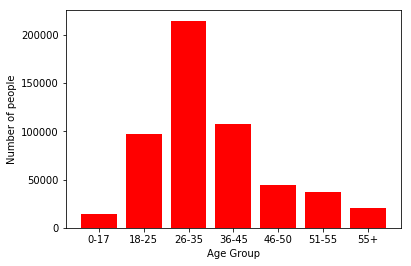

In [12]:
plt.bar(unique_age,age,color='red')
plt.xlabel('Age Group')
plt.ylabel('Number of people')

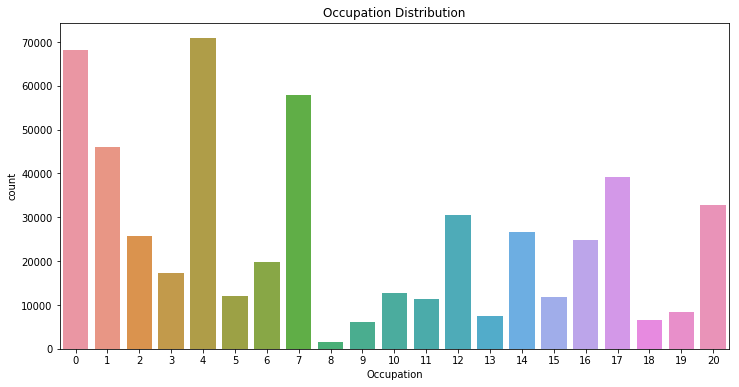

In [13]:
# This sections draws some insights on our data in terms of the occupation of the customers.
plt.figure(figsize=(12,6))
sns.countplot(data['Occupation'])
plt.title('Occupation Distribution')
plt.show()

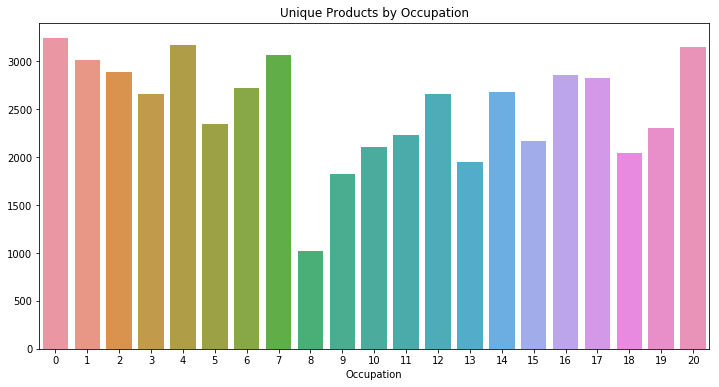

In [15]:
plt.figure(figsize=(12,6))
prod_by_occ = data.groupby(by='Occupation').nunique()['Product_ID']

sns.barplot(x=prod_by_occ.index,y=prod_by_occ.values)
plt.title('Unique Products by Occupation')
plt.show()

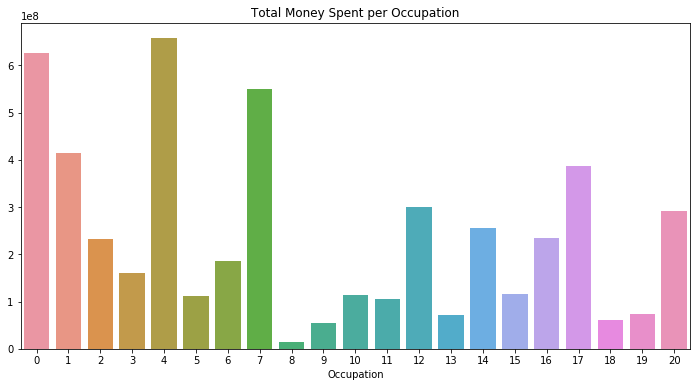

In [17]:
spent_by_occ = data.groupby(by='Occupation').sum()['Purchase']
plt.figure(figsize=(12,6))

sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values)
plt.title('Total Money Spent per Occupation')
plt.show()
